<a href="https://colab.research.google.com/github/jamjewel/DeepLearningProject/blob/master/1_Assignment2__Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stance Classification In Tweets** 

#Exploratory Data Analysis


Loading the required packages we need

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import shutil
import tempfile

from  IPython import display
import re
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Creating DataFrame

In [ ]:
import pandas as pd
import re
df3 = pd.read_csv('train.csv',index_col=None, header=0, engine='python')


In [ ]:
df3.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [ ]:
df3['Target'].unique()

array(['Hillary Clinton', 'Legalization of Abortion', 'Atheism',
       'Climate Change is a Real Concern', 'Feminist Movement'],
      dtype=object)

## Understand Data and Preprocessing

In [ ]:
#grouping
shape_data_group_target= df3.groupby(["Target"])
print(shape_data_group_target.count())
shape_data_group_plot_target= shape_data_group_target.count()

                                  Tweet  Stance  Opinion Towards  Sentiment
Target                                                                     
Atheism                             513     513              513        513
Climate Change is a Real Concern    395     395              395        395
Feminist Movement                   664     664              664        664
Hillary Clinton                     689     689              689        689
Legalization of Abortion            653     653              653        653


,Tweet,Stance,Opinion Towards,Sentiment
Target,,,,
Atheism,513,513,513,513
Climate Change is a Real Concern,395,395,395,395
Feminist Movement,664,664,664,664
Hillary Clinton,689,689,689,689
Legalization of Abortion,653,653,653,653


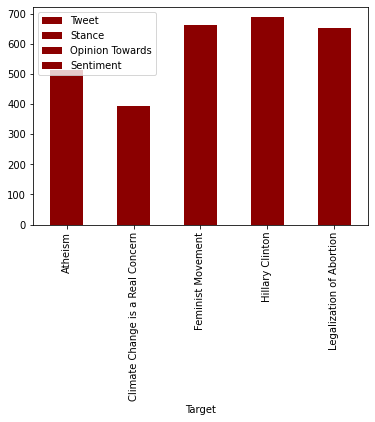

In [ ]:
#plotting bar chart
shape_data_group_plot_target.plot(kind='bar',color=('darkred'))
shape_data_group_target.count()

,Tweet,Target,Opinion Towards,Sentiment
Stance,,,,
AGAINST,1395,1395,1395,1395
FAVOR,753,753,753,753
NONE,766,766,766,766


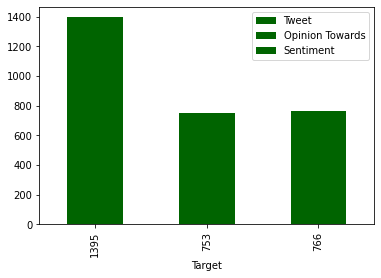

In [ ]:
#grouping
shape_data_group_stance= df3.groupby(["Stance"])
shape_data_group_plot_stance= shape_data_group_stance.count()
#plotting bar chart
shape_data_group_plot_stance.plot('Target',kind='bar',color=('darkgreen'))
shape_data_group_stance.count()

## Analyzing the stance distribution of each Target type 

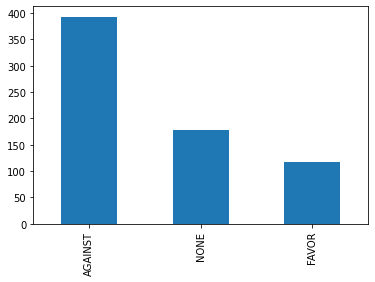

In [ ]:
hillary_df = df3.loc[df3['Target'] == 'Hillary Clinton']
pd.value_counts(hillary_df['Stance']).plot.bar()

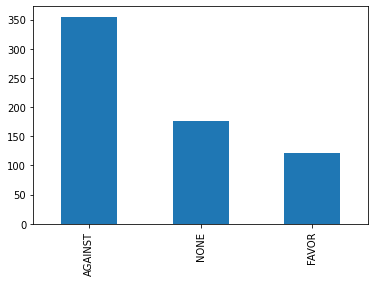

In [ ]:
abortion_df = df3.loc[df3['Target'] == 'Legalization of Abortion']
pd.value_counts(abortion_df['Stance']).plot.bar()

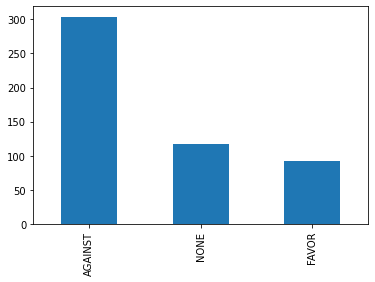

In [ ]:
atheism_df = df3.loc[df3['Target'] == 'Atheism']
pd.value_counts(atheism_df['Stance']).plot.bar()

#### Noticebly, Among the tweets about Climate change, it has a lot of stances with None label 

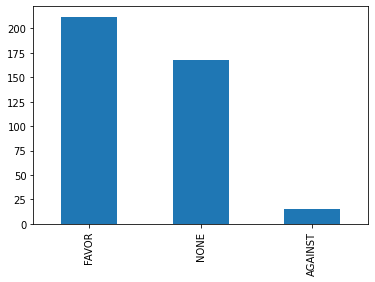

In [ ]:
climate_df = df3.loc[df3['Target'] == 'Climate Change is a Real Concern']
pd.value_counts(climate_df['Stance']).plot.bar()

## Bringing them all together

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


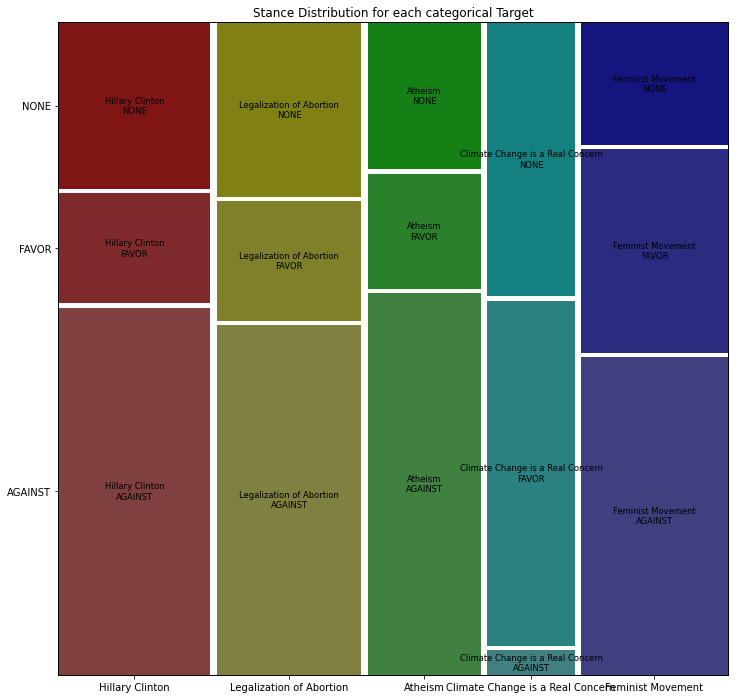

In [ ]:
df1 = pd.DataFrame(df3,columns=['Target','Stance'])

from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(12.0, 12.0)
mosaic(df1, ['Target', 'Stance'],gap=0.01,title='Stance Distribution for each categorical Target');


In [ ]:
df3["Target"].unique()

array(['Hillary Clinton', 'Legalization of Abortion', 'Atheism',
       'Climate Change is a Real Concern', 'Feminist Movement'],
      dtype=object)

In [ ]:
df3["Stance"].unique()

array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [ ]:
encode = {
    "Hillary Clinton" : 0,
    "Legalization of Abortion"  : 1,       
    "Atheism" : 2,    
    "Climate Change is a Real Concern" : 3,     
    "Feminist Movement"  : 4    
        
    
}

df3["Target"] = df3["Target"].apply(lambda x: encode[x])
df3.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,0,NONE,3. The tweet is not explicitly expressing opi...,pos


In [ ]:
original_dataframe = df3.copy()

In [ ]:
df3.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,0,NONE,3. The tweet is not explicitly expressing opi...,pos


## Tokenizing
NLTK tokenizer is used to tokenize

The text is now tokenized that is splitting text into smaller pieces aka token , most common token size is word, it can also be a sentence. We use scikit-learn's CountVectorizer for this, where every row will represent a different document and every column will represent a different word

In [ ]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Cleaning Data

managing numerical data, data cleaning frequently includes eliminating  null values and duplicate data, dealing with outliers, and so on. With text data, there are some basic data cleaning strategies, which are otherwise called text pre-preparing procedures.we're going to follow the MVP (minimum viable product) approach which is start simple and iterate

**Common data cleaning steps applying in twitter language**

- Remove punctuation
- Remove numerical values
- Remove common non-sensical text (/n)
- Tokenize text
- Remove stop words


## User Names can add noise to the tweet

1. In tweets any user is identified with an @ symbol. 
2. Even if we remove the @ Symbol and keep their username , it makes no sense to the tweet
3. This can add noise during training 

In [ ]:
#function to fetch every tweet with @
for index, row in original_dataframe.iterrows():
    if('@' in row['Tweet']):
        print(row['Tweet'], " | Stance ->",row['Stance'])
        print()

@tedcruz And, #HandOverTheServer she wiped clean + 30k deleted emails, explains dereliction of duty/lies re #Benghazi,etc #tcot  | Stance -> AGAINST

@TheView I think our country is ready for a female pres, it can't ever be Hillary  | Stance -> AGAINST

@PortiaABoulger Thank you for adding me to your list  | Stance -> NONE

#StopHillary2016 @HillaryClinton if there was a woman with integrity and honesty I would vote for such as woman president, NO  | Stance -> AGAINST

@HillaryClinton End lawless #ClintonFoundation. Jail Butcher of #Benghazi. #Arrest rapist #BillClinton. #HillaryClinton  | Stance -> AGAINST

@HillaryClinton Hillary pandering with her logo. #ClintonFoundationscandal #ClintonCash  | Stance -> AGAINST

@readyforHRC @HillaryClinton #HillaryClinton, the US presidency is a testament to the success of #women their role in the world  | Stance -> FAVOR

@CiaraAntaya cuz you know I'm such a feminist   | Stance -> NONE

2 million bogus followers on Twitter @HillaryClinton #WhyImN

In [ ]:
#Remove usernames
sample_dataframe = original_dataframe.copy()
def remove_user_names(input_tweet):
    cleanr = re.compile('@\w+')
    cleantext = re.sub(cleanr, '', input_tweet)
    return cleantext

sample_dataframe['Tweet'] = original_dataframe['Tweet'].apply(lambda x: remove_user_names(x))
df3['Tweet'] = df3['Tweet'].apply(lambda x: remove_user_names(x))

In [ ]:
#Checking if usernames is removed
import itertools
for ( index1, row_org ), ( index2, row_modified ) in zip( original_dataframe.iterrows(), df3.iterrows() ) :
    print("Before =",row_org['Tweet'] ,"\nAfter=",  row_modified['Tweet'])
    print("-------------------------------------")

Streaming output truncated to the last 5000 lines.
-------------------------------------
Before = M: FEMINISTS NEED TO GROWA SENSE OF HUMOR W: Okay. (sips from "Male Tears" mug) M: AAIGH!  MISANDREEEEEEEEEEE  #YesAllWomen #SemST 
After= M: FEMINISTS NEED TO GROWA SENSE OF HUMOR W: Okay. (sips from "Male Tears" mug) M: AAIGH!  MISANDREEEEEEEEEEE  #YesAllWomen #SemST
-------------------------------------
Before = those who resist against feminism before us 2016 election, should not be killed. they should be raped to death ... #USElections #SemST 
After= those who resist against feminism before us 2016 election, should not be killed. they should be raped to death ... #USElections #SemST
-------------------------------------
Before = Feminism is not just about women; it's about letting all people lead fuller lives ~ @JaneFonda #life #SemST 
After= Feminism is not just about women; it's about letting all people lead fuller lives ~  #life #SemST
-------------------------------------
Before =

## HashTag analysis

Understanding the impact of Hashtags on a tweet

In [ ]:
# function to collect hashtags
def hashtag_extract(input_text):
    hashtags = []
    # Loop over the words in the tweet
    for i in input_text:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(original_dataframe['Tweet'][original_dataframe['Target'] == 0])
print(HT_regular)

[['HandOverTheServer', 'Benghazi', 'tcot'], ['Ohio'], [], ['WhyImNotVotingForHillary'], [], ['Warren2016'], ['BaltimoreRiots'], [], ['StopHillary2016'], ['ClintonFoundation', 'Benghazi', 'Arrest', 'BillClinton', 'HillaryClinton'], [], ['ClintonFoundationscandal', 'ClintonCash'], ['HillaryClinton', 'women'], [], ['WhyImNotVotingForHillary'], [], [], ['Democrats'], [], [], ['2016', 'Clinton2016'], [], ['NoHillary', 'WhyImNotVotingForHillary'], [], [], [], ['Hillary', 'pizza', 'Italian', 'MSM', 'libertynothillary', 'HillNo'], ['WhyImNotVotingForHillary'], ['Ohio', 'OurChampion'], ['HillNo'], ['clintonfakerealityshow'], ['Fiorina', 'sexist', 'media', 'MSM'], ['NoHillary2016'], ['global', 'moral_humane'], ['Hillary', 'LibertyNotHillary'], ['WhyImNotVotingForHillary'], [], [], [], [], [], ['WakeUpAmerica'], [], [], ['ThatChampion', 'Watergate', 'tcot'], [], ['freedom_justice_equality_education', 'happy_life'], [], ['cantwait'], ['ElPaso', 'Texas', 'MarcoRubio', 'UTEP', 'NewAmericanCentury', 

In [ ]:
# unnesting list
HT_regular = sum(HT_regular,[])
print(HT_regular)

['HandOverTheServer', 'Benghazi', 'tcot', 'Ohio', 'WhyImNotVotingForHillary', 'Warren2016', 'BaltimoreRiots', 'StopHillary2016', 'ClintonFoundation', 'Benghazi', 'Arrest', 'BillClinton', 'HillaryClinton', 'ClintonFoundationscandal', 'ClintonCash', 'HillaryClinton', 'women', 'WhyImNotVotingForHillary', 'Democrats', '2016', 'Clinton2016', 'NoHillary', 'WhyImNotVotingForHillary', 'Hillary', 'pizza', 'Italian', 'MSM', 'libertynothillary', 'HillNo', 'WhyImNotVotingForHillary', 'Ohio', 'OurChampion', 'HillNo', 'clintonfakerealityshow', 'Fiorina', 'sexist', 'media', 'MSM', 'NoHillary2016', 'global', 'moral_humane', 'Hillary', 'LibertyNotHillary', 'WhyImNotVotingForHillary', 'WakeUpAmerica', 'ThatChampion', 'Watergate', 'tcot', 'freedom_justice_equality_education', 'happy_life', 'cantwait', 'ElPaso', 'Texas', 'MarcoRubio', 'UTEP', 'NewAmericanCentury', '2016', 'Future', 'Rub', 'SemST', 'Hillary', 'Liberal', 'SemST', 'SemST', 'world', 'SemST', 'dickcheney', 'Benghazi', 'SemST', 'SemST', 'SemST'

Quest to undertand top word #SemSt gave result that some hashtags used as queries to extract tweets were replaced with "#SemST" to exclude obvious cues for the classification

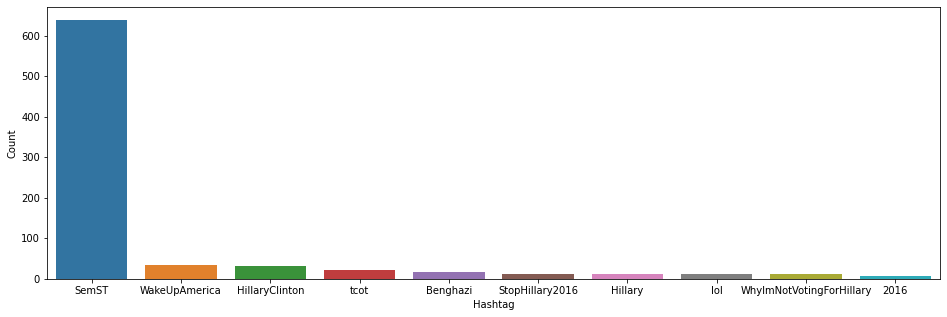

In [ ]:
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Data Engineering

Using CountVectorizer, to remove stop words


## Removing Short Words

Words like "ok", "hmm", "oh" , "k" ,"yep" are of very little use. It is better to get rid of them.

In [ ]:
df3['Tweet'] = df3['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
df3.head(10)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"And, #HandOverTheServer wiped clean deleted em...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary best choice truly want continue being ...,0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,"think country ready female pres, can't ever Hi...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,just gave unhealthy amount hard-earned money a...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,Thank adding your list,0,NONE,3. The tweet is not explicitly expressing opi...,pos
5,Hillary win. Here's hoping Dems offer real can...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
6,"Respect respect Yes, needed desperately. #Balt...",0,NONE,2. The tweet does NOT expresses opinion about ...,pos
7,don't want appointed Ambassador post.,0,NONE,2. The tweet does NOT expresses opinion about ...,neg
8,#StopHillary2016 there woman with integrity ho...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
9,lawless #ClintonFoundation. Jail Butcher #Beng...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [ ]:

happy_lines = list()
lines = df3["Tweet"].values.tolist()
def remove_punct(lines):
    lines  = "".join([char for char in lines if char not in string.punctuation])
    lines = re.sub('[0-9]+', '', lines)
    return lines

df3['Tweet'] = df3['Tweet'].apply(lambda x: remove_punct(x))
df3.head(5)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,And HandOverTheServer wiped clean deleted emai...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary best choice truly want continue being ...,0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,think country ready female pres cant ever Hillary,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,just gave unhealthy amount hardearned money aw...,0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,Thank adding your list,0,NONE,3. The tweet is not explicitly expressing opi...,pos


In [ ]:
def tokenization(lines):
    lines = re.split('\W+', lines)
    return lines

df3['Tweet'] = df3['Tweet'].apply(lambda x: tokenization(x.lower()))
df3.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"[and, handovertheserver, wiped, clean, deleted...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,"[hillary, best, choice, truly, want, continue,...",0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,"[think, country, ready, female, pres, cant, ev...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,"[just, gave, unhealthy, amount, hardearned, mo...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,"[thank, adding, your, list]",0,NONE,3. The tweet is not explicitly expressing opi...,pos


In [ ]:
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(lines):
    lines = [word for word in lines if word not in stopword]
    return lines
    
df3['Tweet'] = df3['Tweet'].apply(lambda x: remove_stopwords(x))
df3.head(5)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"[handovertheserver, wiped, clean, deleted, ema...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,"[hillary, best, choice, truly, want, continue,...",0,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,"[think, country, ready, female, pres, cant, ev...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,"[gave, unhealthy, amount, hardearned, money, a...",0,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,"[thank, adding, list]",0,NONE,3. The tweet is not explicitly expressing opi...,pos


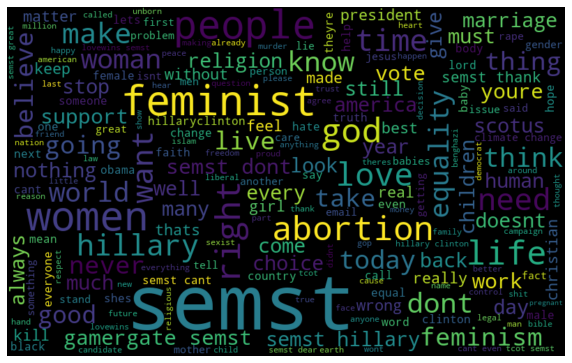

In [ ]:
lists = [text for text in df3['Tweet']]
flat_list = [item for sublist in lists for item in sublist]
all_words = ' '.join(flat_list)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
[text for text in df3['Tweet'][df3['Target'] == 'Hillary Clinton']]

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


[]

## Words in Hillary Clinton tweets

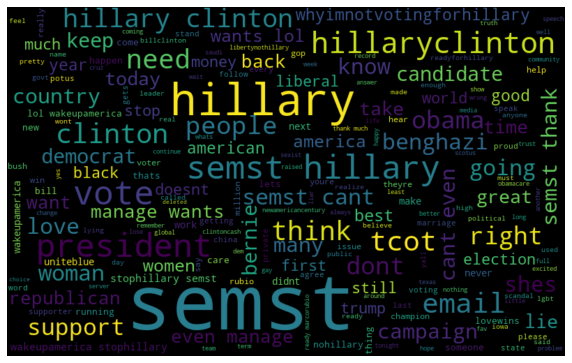

In [ ]:
lists = [text for text in df3['Tweet'][df3['Target'] == 0]]
flat_list = [item for sublist in lists for item in sublist]
hillary_words =' '.join([text for text in flat_list])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hillary_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in Legalization of Abortion tweets

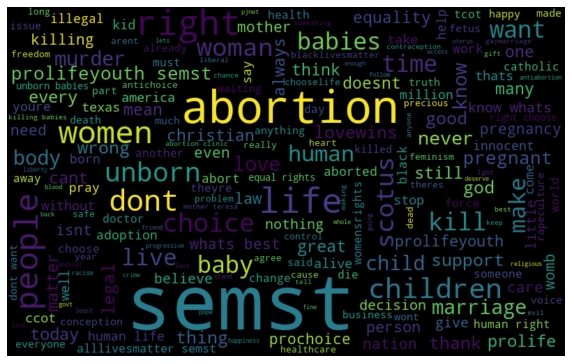

In [ ]:
lists = [text for text in df3['Tweet'][df3['Target'] == 1]]
flat_list = [item for sublist in lists for item in sublist]
Legalization_of_Abortion =' '.join([text for text in flat_list])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Legalization_of_Abortion)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in Atheism tweets

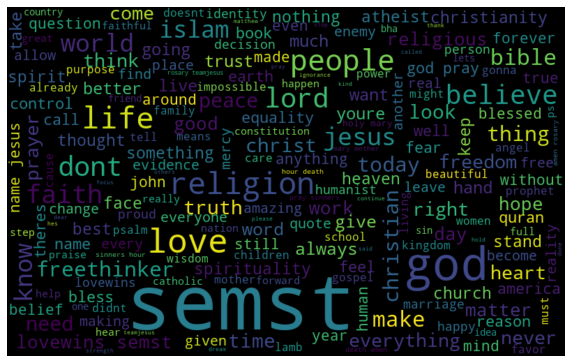

In [ ]:
lists = [text for text in df3['Tweet'][df3['Target'] == 2]]
flat_list = [item for sublist in lists for item in sublist]
Legalization_of_Abortion =' '.join([text for text in flat_list])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Legalization_of_Abortion)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in Climate Change is a Real Concern tweets

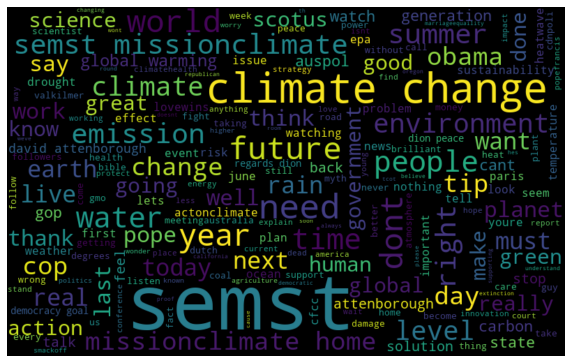

In [ ]:
lists = [text for text in df3['Tweet'][df3['Target'] == 3]]
flat_list = [item for sublist in lists for item in sublist]
Legalization_of_Abortion =' '.join([text for text in flat_list])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Legalization_of_Abortion)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in Feminist Movement tweets

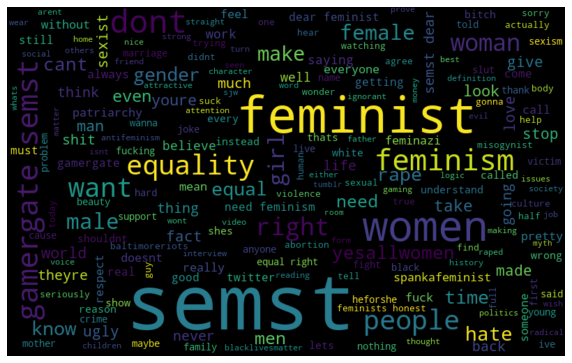

In [ ]:
lists = [text for text in df3['Tweet'][df3['Target'] == 4]]
flat_list = [item for sublist in lists for item in sublist]
Legalization_of_Abortion =' '.join([text for text in flat_list])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(Legalization_of_Abortion)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()